In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import pickle
import cv2
%matplotlib inline

In [12]:
ls model/

all_mean_preprocess.pickle    model_svm.pickle
all_model_svm.pickle          pca_120.pickle
clean_mean_preprocess.pickle  pca_200.pickle
clean_model_svm.pickle        pca_250.pickle
mean_preprocess.pickle        pca_50.pickle


In [93]:
mean = pickle.load(open('./model/clean_mean_preprocess.pickle','rb'))
model_svm = pickle.load(open('./model/clean_model_svm.pickle','rb'))
model_pca = pickle.load(open('./model/pca_250.pickle','rb'))

In [45]:
politician_pre = ['Biedron','Bosak','Duda','Grodzka','Holownia','Kaczynski','Kalisz','Komorowski','Korwin-Mikke','Miller','Szydlo','Trzaskowski','Tusk']
font = cv2.FONT_HERSHEY_SIMPLEX

In [46]:
mean.shape

(14400,)

In [30]:
#test data

def pipeline_model(img, color='bgr'):
    color = 'bgr'
#to gray
    if color == 'bgr':
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#resize image
    if gray.shape[1] > 120:
        gray_resize = cv2.resize(gray,(120,120), cv2.INTER_AREA)
    else:
        gray_resize = cv2.resize(gray,(120,120), cv2.INTER_CUBIC)
#flattening
    gray_reshape = gray_resize.reshape(1,14400)
#subtract with mean

    gray_mean = gray_reshape - mean
#get eigne image
    eigen_image = model_pca.transform(gray_mean)
#pass to ML model (SVM)
    results = model_svm.predict_proba(eigen_image)[0]
    predict = results.argmax() #0 or 1
    score = results[predict]
    print(predict, results)
    
#cv2.putText(img,font,1,(0,255,0),2)

3 [0.05691032 0.01671346 0.00077809 0.35546693 0.00344649 0.00116549
 0.23888479 0.20233159 0.06983297 0.00996504 0.0314067  0.00892093
 0.00417721]


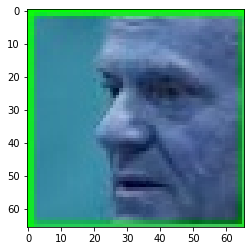

In [31]:
test_data_path = './Cropped/6caef06b8a.jpg'

#read image
img = cv2.imread(test_data_path)
plt.imshow(img)
pipeline_model(img)

83
120
[[150 150 150 ... 154 152 149]]


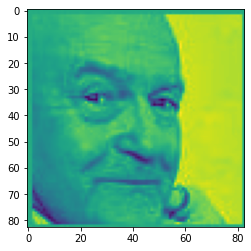

In [90]:
test_data_path = './Cropped/Leszek Miller/4057f6eb54.jpg'


img = cv2.imread(test_data_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

print(gray.shape[1])
if gray.shape[1] > 120:
    gray_resize = cv2.resize(gray,(120,120), cv2.INTER_AREA)
else:
    gray_resize = cv2.resize(gray,(120,120), cv2.INTER_CUBIC)
print(gray_resize.shape[1])
gray_reshape = gray_resize.reshape(1,14400)
print(gray_reshape)

In [91]:
gray_mean = gray_reshape - mean
print(gray_mean)
eigen_image = model_pca.transform(gray_mean)

results = model_svm.predict_proba(eigen_image)[0]
print(results)

[[149.4203312  149.42077097 149.41979437 ... 153.47612938 151.47200309
  148.44308873]]
[0.05691032 0.01671346 0.00077809 0.35546693 0.00344649 0.00116549
 0.23888479 0.20233159 0.06983297 0.00996504 0.0314067  0.00892093
 0.00417721]


In [92]:
predict = results.argmax() #0 or 1
score = results[predict]
print(score)

0.35546692628394855


In [95]:
test_data_path = './Cropped/Leszek Miller/4057f6eb54.jpg'

img = cv2.imread(test_data_path)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

if gray.shape[1]>120:
    gray_resize = cv2.resize(gray,(120,120),cv2.INTER_AREA)
else:
    gray_resize = cv2.resize(gray,(120,120),cv2.INTER_CUBIC)
gray_reshape = gray_resize.reshape(1,14400)
gray_mean = gray_reshape - mean

eigen_image = model_pca.transform(gray_mean)

results = model_svm.predict_proba(eigen_image)[0]

print(results)



[0.05691032 0.01671346 0.00077809 0.35546693 0.00344649 0.00116549
 0.23888479 0.20233159 0.06983297 0.00996504 0.0314067  0.00892093
 0.00417721]
